# Início: 17/06/2021

### Um Olhar no Quadro Geral

Como um bom cientista de dados, a primeira coisa que deve-se fazer é obter a lista de verificação do projeto (ela está no Apêndice B do livro com as explicações na página 542 do PDF).
1. Foque o problema e olhe para o quadro geral;
2. Obtenha os dados;
3. Explore os dados para obter *insights*;
4. Prepare os dados para melhor expor os padrões de dados subjacentes aos algoritmos do Aprendizado de Máquina;
5. Explore vários diferentes modelos e liste os melhores;
6. Ajuste seus modelos e combine-os em uma ótima solução;
7. Apresente sua solução e;
8. Lance, monitore e faça a manutenção de seu sistema.
Essa lista é somente uma base, pode ser alterada sempre que precisar; dependendo da necessidade do projeto.

### Enquandre o Problema

A empresa Machine Learning Housing Corporation contratou os seus serviços! A primeira tarefa dada a você é construir um modelo de preços do setor imobiliário utilizando os dados de censo da Califórnia. Esses dados possuem métricas como renda média, população, preço médio do setor imobiliário e assim por diante para cada grupo de bairros. Os grupos de bairros são as menores unidades geográficas consideradas pelo *US Census Bureau* (um grupo de bairros possui uma população de 600 a 3 mil habitantes). Para deixar mais simples, será chamado de "bairros".

Mas em qual problema o modelo se encaixa? Será supervisionado, não supervisionado ou Aprendizado por Reforço? Isso é uma tarefa de classificação ou regressão ou outra coisa? As técnicas de aprendizado devem ser em lotes ou *online* (incrementação)?.

Esse tipo de problema precisa de um modelo de aprendizado supervisionado, já que os dados de treino vem *rotulados*, ou seja, cada instância vem com o resultado esperado, que é o preço médio do setor imobiliário do bairro. Além do mais, também é uma tarefa de regressão, uma vez que o seu trabalho é retornar a previsão de um valor. Dentro da regressão, esse problema é de *regressão multivariada*, já que o sistema usa várias características para realizar a previsão (renda média, população do bairro, localização etc). Se ao invés do preço do imóvel fosse informado uma classificação em "barato", "médio" e "caro" os valores; deixaria de ser um problema de regressão e passaria a ser um de *classificação*. É importante avaliar antes essas informações para não fazer ao final um modelo que prevê uma coisa totalmente diferente do pedido. E por fim, não existe um fluxo contínuo de dados entrando do sistema, portanto não há necessidade de ajustar rapidamente à mudança de dados, e além disso, os dados possuem um tamanho pequeno de armazenamento; de modo que o aprendizado em lotes funcionará muito bem (1,4 Kb no disco).

### Selecione uma Medida de Desempenho

O próximo passo é selecionar uma medida de desempenho. Uma medida bem comum de se usar em problemas de regressão é a *Raiz do Erro Quadrático Médio* (sigla RMSE, em inglês). Essa técnica informa a quantidade de erros gerados pelo modelo em suas previsões, com um peso maior para grandes erros.

Mas se houver vários valores outlier, o RMSE não lida muito bem com isso. Nesse caso, é interessante usar o *Erro Médio Absoluto* (sigla MAE, em inglês), conhecido também como Desvio Médio Absoluto.

***Após cumprir essas etapas, estamos prontos para começar a programar!***

### Baixar os dados

Pode ser feito de duas formas: baixando via internet e criando o diretório com o banco de dados, ou fazer tudo manualmente. Particularmente prefiro o segundo caso, mas é importante saber que existe a outra forma.

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('housing.csv')

### Uma Rápida Olahada na Estrutura dos Dados

Usando o método *head()* do DataFrame, poderá ser visto as 5 primeiras linhas.

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Cada linha representa um bairro e há 10 atributos separados em colunas. O método *info()* é uma ótima opção para obter uma descrição dos dados, em especial o número total de linhas, o tipo de cada atributo e o número e valores não nulos.

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Existem ao todo 20.640 instâncias (linhas) no conjunto de dados, algo bem pequeno se comparado com os padrões de Aprendizado de Máquina, mas perfeito para começar. É possível reparar que o atributo **total_bedrooms** possui apenas 20.433 valores não nulos, significando que 207 bairro não possuem essa característica. Mais tarde daremos um jeito nisso.

Todos os atributos são numéricos do tipo **float64**, menos a coluna **ocean_proximity**. O seu tipo é **object**, então ele poderia conter qualquer tipo de objeto Python, mas, como carregamos esses dados de um arquivo CSV, é lógico que dever ser um atributo texto. Quando observamos as cinco primeiras linhas, percebemos que os valores dessa coluna em questão estão repetidos, o que significa que provavelmente é um atributo categórico. Podemos descobrir quais categorias existem e quantos bairros pertencem a cada categoria, basta usar o método *value_counts()*.

In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Vamos olhar agora para outros campos. Usar o método *describe()* mostra um resumo dos atributos estatísticos.

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


As linhas de **count**, **mean**, **max** e **min** são autoexplicativas. Preste atenção que os valores nulos são ignorados (como visto na linha **count** da coluna **total_bedrooms**, onde o valor é 20.433 e não 20.640). A linha**std** informa o *desvio padrão*, que mede a dispersão dos valores em torno da média. As linhas **25%**, **50%** e **75%** apresentam os *percentis* correspondentes: um percentil indica o valor abaixo no qual uma dada porcentagem cai em um grupo de observações. Por exemplo, 25% dos bairros tem uma **housing_median_age** menor que 18, enquanto 50% é menor que 29 e 75%, menor que 37. Esses dados estatísticos também atendem por outros nome: 25º percentil ou 1º quartil; a mediana ou 2º quartil e 75º centil ou 3º quartil.

Outro método rápido de perceber o tipo de dado com o quel estamos trabalhando é traçar um histograma para cada atributo numérico. Um histograma mostra o número de instâncias (no eixo vertical) que possuem um determinado intervalo de valores (no eixo horiozntal). Podemos traçar esse único atributo por vez ou chamar o método *hist()* em todo o conjunto de dados e traçar um histograma para cada atributo numérico. Por exemplo, é possível analisar se um pouco mais de 800 bairros possuem um **median_house_value** perto de US$ 100 mill.

In [7]:
# faz rodar no próprio backend do Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

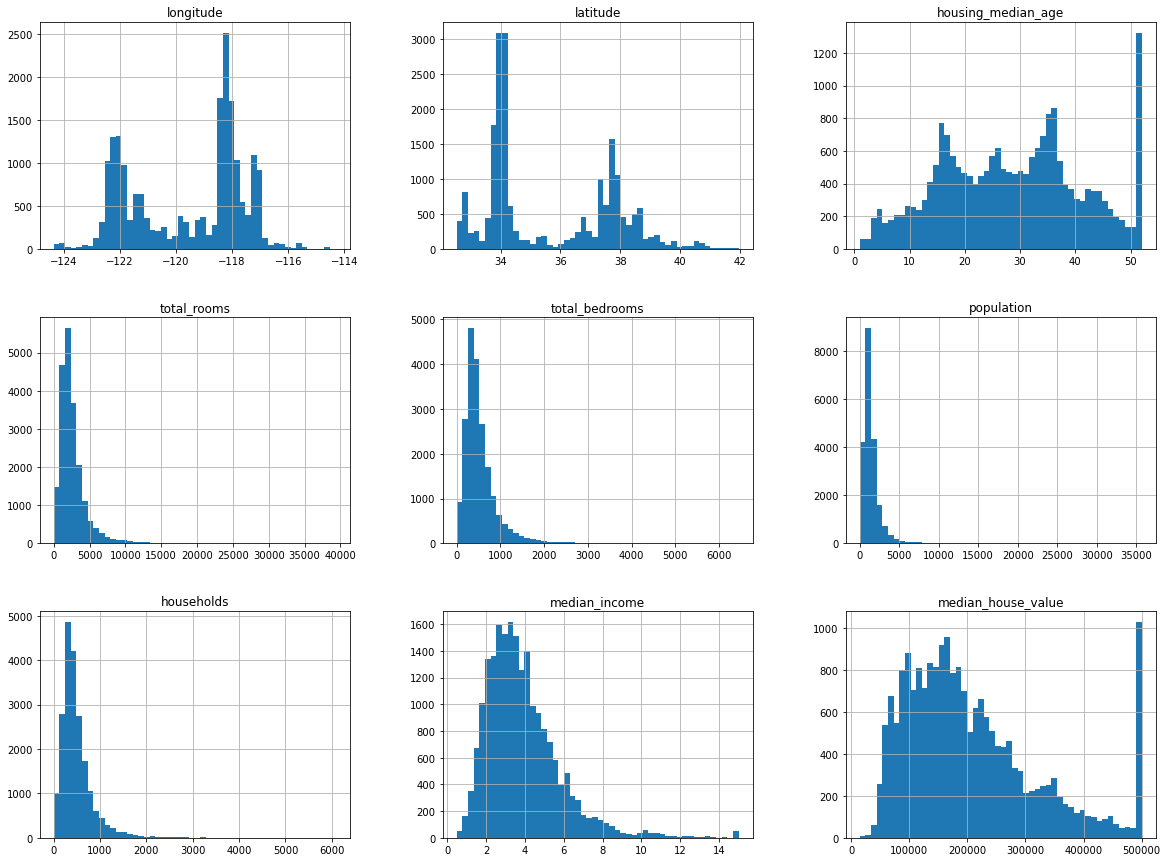

In [8]:
housing.hist(bins=50, figsize=(20, 15))
plt.show() # no Jupyter não precisa desse comando, mas é bom escrever para manter o costume

Prete atenção em alguns pontos destes histogramas:
1. Primeiro, o atributo da renda média não parece estar em dólares americanos (USD). Depois de verificar com a equipe que coleta os dados, somos informados que os dados foram dimensionados e limitados em 15 (na verdade 15,0001) para a média dos maiores rendimentos; e em 0,5 (na verdade 0,4999) para a média dos rendimentos baixos. É comum lidar com atributos pré-processados no Aprendizado de Máquina e esto não é necessariamente um problema, mas devemos tentar entender como os dados foram calculados.
2. A idade média e o valor médio da casa também foram limitados. Este último dado pode ser um problema sério, pois os seus rótulos são o alvo do trabalho. Os algoritmos de Aprendizado de Máquina podem aprender que os preços nunca ultrapassam esse limite. Precisamos verificar com a equipe do nosso cliente (a equipe que usará a saída do nosso sistema) para ver se isso é ou não um problema. Se eles disserem que precisam de previsões precisas mesmo acima de US$ 500 mil, então teremos duas opções:
    
    - Coletar rótulos adequados para os bairros cujos rótulos foram limitados ou;
    - Remover esses bairros do conjnto de treinamento e de teste, uma vez que o nosso modelo não deve ser responsabilizado por prever valores além de US$ 500 mil.

3. Esses atributos possuem escalas bem diferentes. Discutiremos isso mais adiante neste capítulo, quando formos explorar o escalonamento das características.
4. Por fim, muitos histogramas possuem um *rastro alongado*: eles se estendem muito mais à direita da média do que à esquerda. Isso pode dificultar a detecção de padrões em alguns algoritmos do Aprendizado de Máquina. Vamos tentar transformar esses atributos mais tarde para conseguir mais distribuições na forma de sino.

Espero que tenhamos compreendido melhor os tipos de dados com que estamso trabalhando. Mas calma lá, antes de analisar mais os dados, precisamos criar um conjutno de teste; colocá-lo de lado e nunca mais checá-lo.

### Crie um Conjunto de Testes

Pode parecer contra intuitivo colocar de lado, de maneira voluntária, uma parte dos dados nesta etapa. Afinal, nós só demos uma olhada rápida nos dados e certamente precisamos aprender muito mais a respeito antes de escolher qual algoritmo usar, correto? Isso é verdade, mas o nosso cérebro é uma incrível máquina de detectar padrões, o que significa que é altamente propenso a *sobreajuste*: se olharmos para o conjunto de teste, podemos empacar em algum tipo de padrão aparentemente interessante nos dados de teste, que por sua vez nos levará a selecionar um tipo particular de modelo do Aprendizado de Máquina. Quando estimamos o erro de generalização usando o conjunto de teste, nossa estimativa será muito otimista e lançaremos um sistema que não funcionará como o esperado. Isso é conhecido como *data snooping bias*.

Criar um conjunto de testes é, na teoria, muito simples: basta escolher aleatóriamente algumas instâncias, é comum usar 20% dos dados, e colocalos de lado.

In [9]:
import numpy as np

In [10]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

A função pode ser usada assim:

In [11]:
train_set, test_set = split_train_test(housing, 0.2)
print(f'''Treino: {len(train_set)}
Teste: {len(test_set)}''')

Treino: 16512
Teste: 4128


Isso funciona, mas não é o ideal. Ao executar o programa de novo, será gerado um conjunto diferente de teste! Isso não é uma coisa ruim, mas ao longo do tempo; todos os dados do conjunto serão vistos, o que deve ser evitado.

Uma solução seria salvar o conjunto de testes na primeira execução e depois carregá-lo para as outras execuções. Outra alternativa é definir a semente do gerador de números aleatórios (por exemplo, **np.random.seed(42)**) antes de chamar a função **np.random.permutation()**, de maneira que o código sempre gere os mesmos índices embaralhados.

O problema é que sempre que for usado um conjunto de dados atualizados, ambas as soluções não fazem mais sentido existirem; teremos de fazer esses dois passos de volta e de volta e de volta... . Uma solução trivial é usar o identificador de cada instância para decidir se ela deve ou não ir no conjunto de teste (partindo do pressuposto que as instâncias possuam um identificador único e imutável). Por exemplo, podemos calcular um hash de indetificador de cada instância, manter apenas o último byte do hash e colocar a instância no conjunto de teste se esse valor for menor ou igual a 51 (~20% de 256). Isso garante que o conjunto de teste permanecerá consistente em várias execuções, mesmo ao atualizar o conjunto de dados. O novo conjunto de testes conterá 20% das novas instâncias, mas não conterá nenhuma instância que já estivesse no conjunto de treinamento.

In [12]:
import hashlib

In [13]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [14]:
def split_train_test_by_id(data, test_ratio, id_column,
                          hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(
    id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

Infelizmente, o conjunto de dados do setor imobiliário não possui uma coluna de identificação. A solução mais simples pe utilizar o índice da linha como identificação (ID).

In [15]:
## RODAR SÓ UMA VEZ ESSE CÓDIGO!!!
## Adiciona uma coluna 'index' e a antiga passa a ser uma
## coluna, no caso de ID
housing_with_id = housing.reset_index()
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
train_set, test_set = split_train_test_by_id(housing_with_id,
                                           0.2, 'index')
print(f'''Treino: {len(train_set)}
Teste: {len(test_set)}''')

Treino: 16362
Teste: 4278


Se utilizarmos o ínoce de linha como identificador exclusivo, precisamos certificar de que novos dados sejam anexados ao final do conjunto de dados e que nenhuma linha seja excluída. Se isso não for possível, tentaremos usar características mais estáveis para criar um identificador mais exclusivo. Por exemplo, a latitude e longitude de um bairro serão certamentes estáveis por milhões de anos, então é uma boa ideia combinar essas duas informações em um ID dessa maneira:

In [17]:
housing_with_id['id'] = housing['longitude'] * 1000 + \
housing['longitude']
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122352.23
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122342.22
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122362.24
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122372.25
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122372.25


In [18]:
train_set, test_Set = split_train_test_by_id(
    housing_with_id, 0.2, 'id')
print(f'''Treino: {len(train_set)}
Teste: {len(test_set)}''')

Treino: 16680
Teste: 4278


O Scikit-Learn oferece algumas funções para dividir conjuntos de dados em vários subconjuntos de diversas maneiras. A função mais simples é a **train_test_split**, que funciona semelhante a nossa função feita **split_train_test**, mas com alguns recursos a mais (afinal de contas, é uma biblioteca completa né). Primeiro, há o parâmetro **random_state** que permite que definamos a semente do gerador de números aleatórios como dito anteriormente e, em segundo lugar, podemos passar múltiplos conjuntos de dads com um número idêndico de linhas, e ele os dividirá nos mesmos índices. Isso é muito útil se tivermos um DataFrame separado por rótulos.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_set, test_set = train_test_split(housing, test_size=0.2,
                                      random_state=42)
print(f'''Treino: {len(train_set)}
Teste: {len(test_set)}''')

Treino: 16512
Teste: 4128


Segundo o histograma feito mais acima, a maioria dos valores médios da renda está agrupada entre US$ 20 mill - US$ 50 mil mas com alguns rendimentos passado a casa dos US$ 60mil. É importante ter um número suficiente de instâncias para cada estrato em nosso conjunto de dados, ou então a estimativa da importância do estrato poderá ser bem tendenciosa. Isso diz que não devemos ter muitos estratos, e cada camada deve ser grande o suficiente. O código abaixo cria um atributo da categoria da renda média dividindo-a por 1,5 (isso serve para limitar o número de categorias da renda) e arredondando com a função **ceil** (para categorias discretas) e, em seguida, juntando todas as categorias maiores que 5 na categoria 5.

In [21]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0,
                           inplace=True)

Abaixo é mostrado um gráfico representando essas categorias.

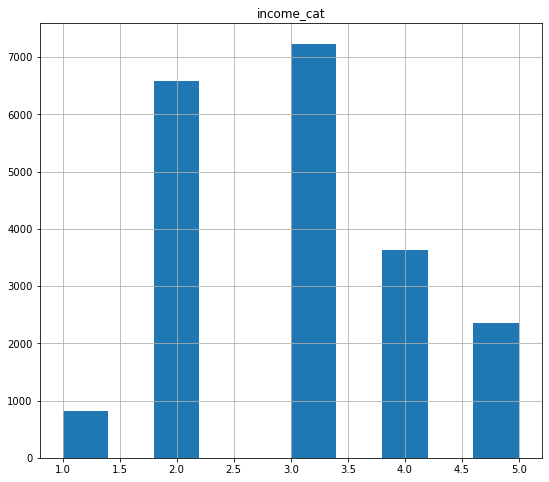

In [22]:
housing.hist(['income_cat'], figsize=(9, 8))
plt.show()

Agora estamos prontos para realizar uma amostragem estratificada com base na categoria de renda. Para essa tarefa, podemos utilizar a classe **StratfiedShuffleSplit** do Scikit-Learn.

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

In [24]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
                              random_state=42)
for train_index, test_index in split.split(housing,
                                          housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Vamos ver se funcionou como o esperado. Podemos começar pela análise das proporções da categoria de renda no grupo de testes.

In [25]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

A figura abaixo compara as proporções da categoria de renda no conjunto geral de dados, no conjunto de teste gerado com a amostragem estratificada e em um conjunto de testes gerado a partir da amostragem puramente aleatória. Como podemos notar, o grupo de testes gerado com a utilização da amostragem estratificada possui proporções da categoria de renda quase semelhantes às do conjunto completo de dados, enquanto o conjunto de testes gerado com amostragem puramente aleatório é bastante distorcido.
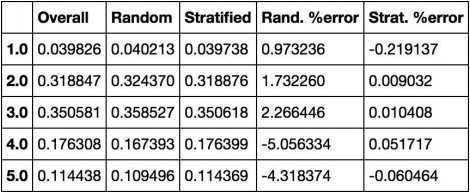

Agora podemos remover a coluna **income_cat** para que os dados voltem ao estado original.

In [26]:
### RODAR SOMENTE UMA VEZ!!!
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

Ficamos um bom tempo na geração de conjunto de testes por um bom motivo: esta parte vital é muitas vezes negligenciada em um projeto de Aprendizado de Máquina. Além disso, muitas dessas ideias levantadas aqui serão úteis mais tarde quando discutirmos a validação cruzada. Agora, é hora de avançar para o próximo estágio: explorar os dados.

### Descubra e Visualize os Dados para Obter Informações

Até esse ponto nós demos uma olhada rápida para ter uma noção geral do tipo de dados que estamos manipulando. Agora, o objetivo é aprofundar um pouco mais.

Primeiro, devemos nos certificar de colocar o teste de lado e explorar apenas o grupo de treino. Além disso, se o conjunto de treinamento foi grande demais, talvez seja melhor experimentar um conjunto de exploração para realizar facilmente e rapidamente as manipulações. No nosso caso, o grupo de dados é muito pequeno (se comparado com os que realmente são usados para o Aprendizado de Máquina), então podemos trabalhar diretamente no conjunto completo. Criaremos uma cópia para que possamos mexer sem ter o perigo de estragar o conjunto original.

In [27]:
housing = strat_train_set.copy()

### Visualizando Dados Geográficos

Como há nos dados as informações das coordenadas geográficas (latitude e longitude), é uma boa ideia criar um diagrama de dispersão para visualizar os dados de todos os bairros.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

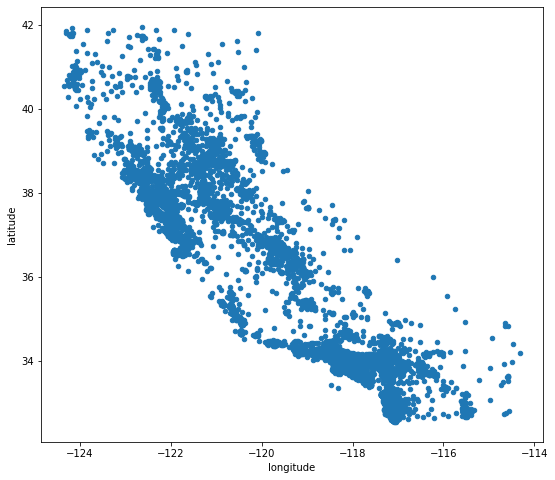

In [28]:
housing.plot(kind='scatter', x='longitude', y='latitude',
            figsize=(9, 8))

Olhando, parece com o estado da Califórnia, mas além disso, é difícil analisar se há algum padrão específico. Definir a opção **alpha** com o valor de 0.1, ajuda e muito na visualização dos locais onde há uma alta densidade de pontos.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

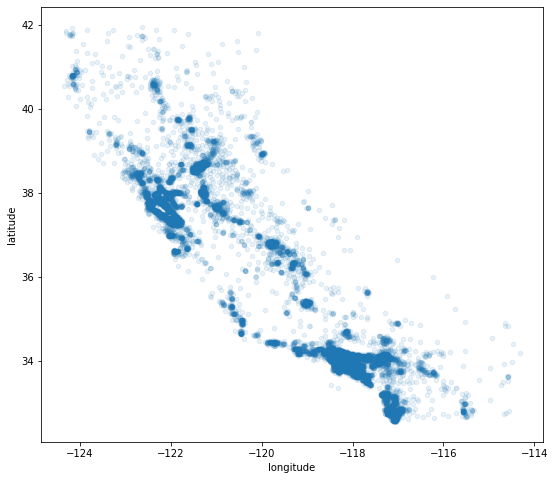

In [29]:
housing.plot(kind='scatter', x='longitude', y='latitude',
       alpha=0.1, figsize=(9, 8))

Agora está bem melhor: é possível notar onde estão as áreas de alta densidade, especificamente a Área da Baía de Los Angeles e San Diego, além de uma longa linha de alta densidade no Vale Central, principalmente ao redor de Sacramento e Fresno.

De modo geral, nosso cérebro é muito bom em detectar padrões em imagens, porém talvez seja necessário brincar com parâmetros de visualização para que os padrões se destaquem.

Agora, analisaremos os preços do setor imobiliário. O raio de cada círculo representa a população do bairro (opção **s**). Usaremos um mapa de cor já definido chamdo **jet** (opção **cmap**), que vai do azul (valores baixos) até o vermelho (valores altos).

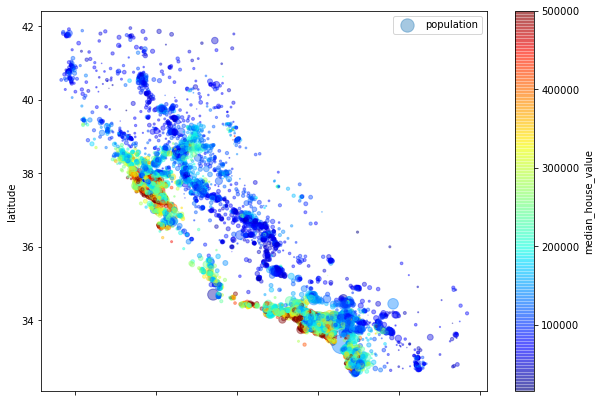

In [30]:
housing.plot(kind='scatter', x='longitude', y='latitude',
            alpha=0.4, s=housing['population']/100,
             label='population', c='median_house_value',
            cmap=plt.get_cmap('jet'), colorbar=True,
            figsize=(10, 7))
plt.legend()

Esta figura acima informa que os preços do setor imobiliário estão muito relacionados à localização (por exemplo, perto da costa) e à densidade populacional, como provavelmente já sabiamos. Será útil utilizar um aloritmo de agrupamento para detectar os grupos principais e adicionar novas características que medem a proximidade com os centros de agrupamento. O atributo de proiximidade da costa pode ser útil, embora na costa norte os preços não sejam tão altos, portanto essa não é uma regra simples.

### Buscando correlações

Como o nosso grupo de dados é bem peqeno, calcular a o *coeficiente de correlação padrão* (conhecido também como *r de Pearson*) entre cada par de atributos usando o método *corr()* é ma tarefa fácil.

In [31]:
corr_matrix = housing.corr()

Agora, vejamos o quanto cada atributo se correlaciona com o valor médio da habitação.

In [32]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

O coeficiente de correlação varia de -1 a 1. Quando o coeficiente está perto de 1, significa que existe uma forte correlação positiva entre os dados analisados; por exemplo, o valor médio da casa tende a aumentar quando a renda média aumenta. Por outro lado, quando o coeficiente está próximo de -1, significa que há forte correlação negativa entre os dados analisados; por exemplo, quanto mais para o norte (latitude), menor é o preço médio da casa. Por fim, valores de correlações próximas de 0 indicam que não há correlação entre os dados. A imagem a seguir mostra várias plotagens com o valor do coeficiente da variabilidade.
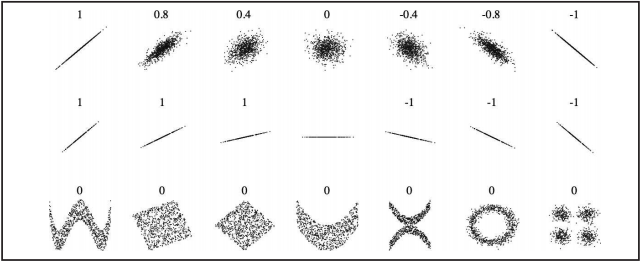

Outro jeito de verificar a correlação entre atributos é usar a função **scatter_matrix** do pandas, que plota cada atributo numérico em relação a qualquer outro atributo numérico. Como há 11 colunas numéricas, obteriamos 11^2 = 121 plotagens, o que não caberia em uma página e demoraria um boooom tempo. Por isso, focaremos somente em alguns atributos promissores que parecem mais correlacionados com o valor médio do setor imobiliário.

In [33]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

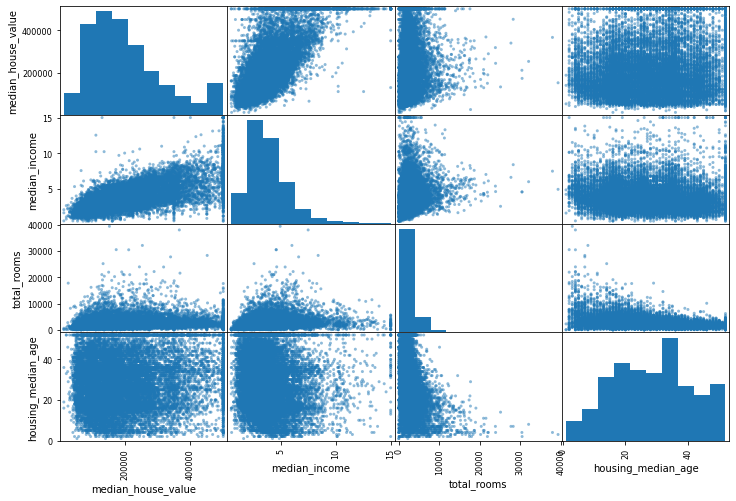

In [34]:
attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

A diagonal principal (começando pelo canto superior esquerdo) seria cheia de linha retas se o pandas plotasse cada variável  em relação de si mesmo, o que não é algo muito útil. Em vez sisso, o pandas mostra um histograma para cada atributo.

O atributo mais promissor para prevero valor médio da casa é a renda média, portanto vamos observar o gráfico de dispersão de corelação.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

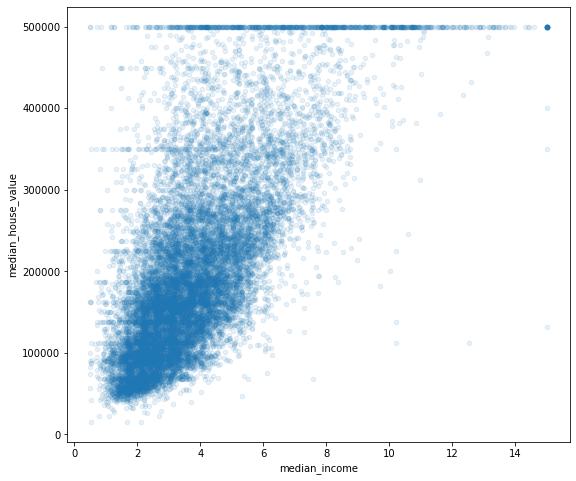

In [35]:
housing.plot(kind='scatter', x='median_income',
             y='median_house_value', alpha=0.1, figsize=(9, 8))

A plotagem acima revela algumas coisas. Primeiro, a correlação é realmente muito forte; é possível notar claramente a tendência de crescimento, e os pontos não estão muito dispersos. Em segundo lugar, o limite de preços que vismos anteriormente fica muito bem visível como uma linha horizontal no eixo Y em 500000. Porém, essa plotagem revela outras linhas retas menos óbvias: uma horizontal em torno do valor de 450000, uma mais abaixo perto de 350000, outra em 280000 e algumas mais abaixo. Podemos tentar retirar esses bairros correspondentes paa evitar que os nossos algoritmos parendam a reproduzir essa particularidade dos dados.

### Experimentação com Combinações de Atributo

A última coisa que podemos fazer antes de prepara os dados para os algoritimos de Aprendizado de Máquina, é tentar realizar diversas combinações de atributos. Por exemplo, o número total de cômodos em um bairro não possui muita utilidade se não soubermos quantos domicílios existem. O que queremos é o número de cômodos por domicílio. Da mesma maneira, o número total de quartos sozinho não é nada útil: bem provavelmente queremos compará-lo com o número de cômodos. E a população por domicílio também parece ser uma combinação de atributos interessante. Portanto, criaremos esses novos atributos.

In [36]:
## Cômodos por domicílios
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
## Quartos por quantidade de cômodos
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
## Quantidade de pessoas por domicílio
housing['population_per_household'] = housing['population']/housing['households']

Agora vejamos a matriz de correlação novamente:

In [37]:
corr_matrix = housing.corr()

In [38]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Nada mal! O novo atributo **bedrooms_per_room** está muito masi correlacionado com o valor médio da habitação do que com o número total de cômodos ou quartos. Aparentemente, as casas com uma baixa relação de quarto/cômodo tendem a ser mais caras. O número de cômodos por domicílio também é mais informativo do que o número total de cômodos em um bairro -logicamente, quanto maiores as casas, mais caras são.

Esta etapa de exploração não precisa ser muito minuciosa; o objetivo é começar com o pé direito e rapidamente obter informações que nos ajudarão a criar um primeiro protótipo razoavelmente bom. Mas este é um processo iterativo: uma vez que obtivermos um protótipo funcional, poderemos analisar sua saída para adquirir mais informações e voltar a este passo da exploração.

### Prepare os Dados para Algoritmos do Aprendizado de Máquina

É hora de preparar os dados para o nosso algoritmo de Aprendizado de Máquina. Em vez de fazer esse trabalho na mão, vamos escrever funções; por alguns bons motivos:
- Isso permite que reproduzamos essas transformações facilmente em qualquer conjunto de dados (por exemplo, na próxima vez que recebermos um novo conjunto de dados);
- Construiremos gradualmente uma biblioteca de funções de transformação que poderão ser reutilizadas em outros projetos;
- Podemos usar essas funções em nosso sistema ao vivo para transformar os novos dados antes de fornecê-los aos nossos algoritmos e;
- Isso possibilitará que tentemos diversas transformações facilmente e ver qual combinação funciona melhor..

Contudo, primeiro vamos reverter para um conjunto de treinamento limpo (copiando **strat_train_set** de novo), e vamos separar os rótulos e previsores, já que não queremos necessariamente aplicar as mesmas transformações às previsões e aos valores-alvos (observe que *drop()* cria uma cópia dos dados e não afeta **strat_train_set**):

In [39]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Limpando os Dados

A maioria dos algoritmos de Aprendizado de Máquina não pode consegue funcionar com características faltantes, portanto criaremos algumas funções para cuidar delas. Como visto lá no começo do estudo, vimos que a coluna **total_bedrooms** possui alguns valores faltantes. Há três opções para consertar isso:
- Livrar-se dos bairros corrspondentes (linhas);
    - Opção 1:
        - housing.dropna(subset=['total_bedroms'])
- Livrar-se de todo o atributo (coluna) e;
    - Opção 2:
        - housing.drop('total_bedrooms', axis=1)
- Definir valores para algum valor (zero, média, valor acima etc).
    - Opção 3:
        - median = housing['total_bedrooms'].median()
        - housing['total_bedrooms'].fillna(median, inplace=True)

Escolheremos a *Opção 3*, que calcula o valor médio no conjunto de treinamento, pois o usaremos mais tarde para substituir os valores faltantes no conjunto de testes quando quisermos avaliar o nosso sistema e também quando o sistema entrar em operação para susbtituir os valores faltantes:

In [40]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)

O Scikit-Learn fornece uma classe acessível para cuidar dos valores nulos conhecida como **Imputer**. Primeiramente, devemos criar uma instância do **Imputer**, especificando que desejamos substituir os valores faltantes de cada atributo pela média desse mesmo atributo:

In [41]:
from sklearn.impute import SimpleImputer

In [42]:
imputer = SimpleImputer(strategy='median')

Uma vez que a média pode ser calculada somente por números, precisamos criar uma cópia com os dados sem o atributo de texto **ocean_proximity**:

In [43]:
housing_num = housing.drop('ocean_proximity', axis=1)

Agora podemos ajustar a instância **imputer** aos dados de treinamento usando o método *fit()*

In [44]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

O **imputer** simplismente calculou a média de cada atributo e armazenou o resultado em sua variável da instância **statistics_**. Somente o atributo **total_bedrooms** posuia valores faltantes, mas não podemos ter certeza de que não existirá valores faltantes nos novos dados após o sistema entrar em operação. Por isso, é mais seguro aplicar o **imputer** para todos os dados numéricos:

In [45]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [46]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Agora podemos utilizar o **imputer** "treinado" substituindo os valores perdidos pelas médias aprendidas com a finalidade de transformar o conjunto de treinamento:

In [47]:
X = imputer.transform(housing_num)

O resultado será um array NumPy simples que contém as características transformadas. Se quisermos colocá-lo novamente em um DataFrame pandas, é simples:

In [48]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


### Manipulando Texto e Atributos Categóricos

Anteriormente, excluímos o atributo categórico **ocean_proximity** por ser um atributo de texto, portanto não é possível calcular a sua média:

In [49]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

De qualqer maneira, a maioria dos algoritmos de Aprendizado de Máquina prefere trabalhar com números, logo, vamos converter essas categorias de texto para números. Para tanto, podemos utilizar o método *factorize()* do pandas, que mapeia cada categoria para um número inteiro diferente:

In [50]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

Este é o melhor: **housing_cat_enconded** agora é puramente numérico! O método *factorize()* também retorn a lista de categorias ('<1H OCEAN' foi mapeado para 0; 'NEAR OCEAN', para 1 e assim por diante):

In [51]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

Um problema nessa representação dos dados é que os algoritmos de Aprendizado de Máquina assuimirão que dois valores próximos são mais parecidos do que dois valores distantes. Claramente, esse não é o caso (por exemplo, as categorias 0 e 4 são mais senelhantes do que as 0 e 2). Para contornar essa situação, uma solução comum seria a criação de um atributp binário por categoria: um atributo igual a 1 quando a categoria for '1H OCEAN' (e 0 caso contrário), 1 para 'NEAR OCEAN' e 0 caso o contrário e assim por diante. Isso chama-se *one-hot encoding*, porque apenas um atributo será igual a 1 (hot) enquanto os outros serão 0 (cold).

O Scikit-Learn possui um codificador **OneHotEncoder** para converter valores categóricos inteiros em vetores *one-hot*. Vamos programar as categorias como vetores *one-hot*:

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

O *fit_transform()* espera um array 2D, mas *housing_cat_encoding* é um array 1D, precisando assim remodelá-lo. Além disso, observe que a saída é uma *matriz esparsa* SciPy, não um array NumPy. Isso é muito útil quando possuímos atributos categóricos com milhares de categorias. após um *one-hot encoding*, obtermos uma matriz com milhares de colunas e cheia de zeros, exceto por um número 1 por linha. Seria muito desperdício usar toneladas de memória para armazenar zeros, portanto ao invés disso, uma matriz esparsa armazena apenas a localização dos elementos diferentes de zero. Podemos utilizá-la principalmente com um array 2D normal, contudo, se realmente quisermos convertê-la em um array (denso) NumPy, basta chamar o étodo *toarray()*:

In [54]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Poemos aplicar ambas as transformações de uma única vez (de categorias de texto a categorias de inteiros, depois de categorias de inteiros para vetores *one-hot*) usando a classe **CategoricalEncoder** so Scikit-Learn (não achei direito na documentação como usar, mas segue a foto de como é o código).
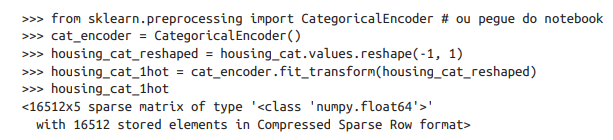

In [55]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [56]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Customize Transformadores

Mesmo o Scikit-Learn fornecendo muitos transformadores úteis, precisaremos escrever nossos próprios operadores de limpeza ou combinar algum atributo específico. É necessário que o nosso transformador funcione perfeitamento com o Scikit-Learn (como os *pipelines*)e, como o Scikit-Learn depende da tipagem *duck typing* (não herança), precisaremos somente criar uma clase e implementar os três métodos: *fit()*, *transform()* e *fit_transform()*. O último item é obtido ao acrescentar **TransformerMixin** em uma classe base. Além disso, podemos adicionar **BaseEstimator** em nossa classe base, que recebe foi parâmetros extras (*get_parms()* e *set_params()*) que serão muito úteis para o ajuste automático do hiperparâmetros. Por exemplo, o código abaixo é uma pequena classe **transformer** que adiciona os atributos combinados discutidos nesse parágrafo:

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin

In [58]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttibuitesAdder(BaseEstimator, TransformerMixin):
    # sem *args ou **kargs
    def __init__(self, add_bedrooms_per_room=True) :
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nada a se fazer
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household,
                         population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household,
                        population_per_household]

attr_adder = CombinedAttibuitesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

No exemplo acima, o transformador possui um hiperparâmetro chamado **add_bedrooms_per_room** com um valor padrão de **True**. Esse hiperparâmerto permite que vejamos facilmente se a adição deste grupo ajuda ou não nos algoritmos de Aprendizado de Máquina. De modo geral, podemos adicionar um hiperparâmetro para controlar qualquer etapa de preparação de dados sobre a qual não temos 100% de certeza.

### Pipelines de Transformação

Como podemos ver, há muitas etapas de transformação de dados que precisam ser executadas na ordem correta. Felizmente, o Scikit-Learn já possui uma classe chamada **Pipeline** para nos auxiliar nessa sequência de transformação. A seguir, um pequeno pipeline para atributos numéricos:

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [60]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttibuitesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

O construtor **Pipeline** se vale de uma lista de pares de nome/estimador em uma lista de tuplas que definem uma sequência de etapas. Todos, exceto o último estimador, devem ser trasnformadores, isto é: devem possuir em seu código um método *fit_transform()*. Os nomes podem ser qualquer um, só não pode ter sublinhados duplos (__)

Quando chamamos o método *fit()* do pipeline, ele chama o *fit_transform()* de cada transformador em sequência, passando a sída de cada chamada como parâmetro para a próxima; até chegar ao estimador final, cujo possui somente o método *fit()*.

O pipeline mostra os mesmo métodos que o estimador final. No exemplo acima, o último estimador é um **StandardScaler**, que é um transformador, então o pipeline possui um método *transform()* que aplica todas as transformações aos dados em sequência. O **StandadScaler** possui também um método *fit_transform()* que poderíamos ter utilizado em vez de chamar o *fit()* e depois *transform()*

Nesse momento, seria uma ótima ideia se pudéssemos oferecer para o nosso pipeline um DataFrame pandas que contivesse colunas não numéricas em vez de termos que primeiro extrair manualmente as colunas numéricas em um array NumPy. O Scikit-Learn não conta com uma ferramenta que lide com DataFrame de pandas, mas podemos escrever um transformador personalizado que realize essa tarefa:

In [61]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values

Em nossa classe **DataFrameSelector**, os dados selecionados dos atributos requeridos serão transformados, descartando o resto e convertendo o DataFrame retornado em um array NumPy. Com isso, podemos facilmente escrever um pipeline que terá um DataFrame pandas e lidar apenas com os valores numéricos: o pipeline começaria apenas com um **DataFrameSelector** para escolher os atributos numéricos, seguido dos outros passos de pré-processamento falado anteriormente. Podemos escrever outro pipeline com facilidade para os atributos categóricos simplismente ao selecioná-los usnado a classe **DataFrameSelector** e depois aplicando um **CategoricalEncoder**:

In [114]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttibuitesAdder()),
    ('std_scaler', StandardScaler()),
])

Mas como é possível juntar esses dois pipelines feitos em um só? A resposta para essa pergunta é utilizar a classe **FeatureUnion** do Scikit-Learn. Daremos uma lista de transformadores; quando o método *transform()* é chamado, ele executa cada método *transform()* em paralelo, espera a sua saída e em seguida, concatena e retorna o resultado. O mesmo vale para o método *fit()*. Um pipeline completo que  manipula ambos os atributos numéricos e categóricos é mais ou menos assim:

In [110]:
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

In [115]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

Podemos executar todo o pipeline simplismente:

In [116]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [117]:
housing_prepared.shape

(16512, 16)

### Selecione e Treine um Modelo

Chegou o grande momento! Nos enquadramos o modelo, obtivemos os dados e os exploramos, selecionamos um conjunto de treinamento e um conjunto de testes e escrevemos canais de transformação para limpar e preparar automaticamente os nossos dados para os algortimos de Aprendizado de Máquina.  Agora estamos prontos para selecionar e treinar um modelo de Aprendizado de Máquina.

### Treinando e Avaliando o Conjunto de Treinamento

A boa notícia é que como fizemos muita coisa nas etapas anteriores, as coisas daqui para frente serão simples de se realizar. O primeiro modelo que treinaremos será o de **Regressão Linear**.

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Beleza! Agora possuímos um modelo de Regressão Linear funcional. Vamos testar isso em algumas instâncias do conjunto de treinamento:

In [69]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [70]:
print(f'Predições: {lin_reg.predict(some_data_prepared)}')

Predições: [210644.60463287 317768.8061821  210956.43380708  59218.98945113
 189747.55838105]


In [71]:
print(f'Labels: {list(some_labels)}')

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Funciona, mesmo que as previsões não sejam bem precisas (por exemplo, a primeira previsão possui cerca de 40% de erro!!!). Vamos medir a RMSE desse modelo de regressão em todo o conjunto de treinamento com o uso da função **mean_squared_error** de Scikit-Learn:

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,
                             housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848926

Ok, "tá ruim, mas tá bom", mas certamente não é uma grande pontuação: a maioria dos valores em **median_housing_values** dos bairros varia entre 120 mil e 265 mil dólares, portanto um erro de margem de US$ 68.628 não é muito aceitável. Esse modelo gerado é um exemplo de modelo de subajusto dos dados de treinamento. Quando algo parecido com isso ocorre, pode significar que as caracteríisticas não entregam informações suficientes para realizar boas previsões ou que o modelo não é suficientemente poderoso. Como lido no capítulo anterior, as principais formas de corrigir o *subajuste* são:
- Selecionar um modelo mais poderoso;
- Alimentar o algoritmo de treinamento com melhores características ou;
- Reduzir as restrições no modelo.

Esse modelo não é regularizado, fazendo com que a última opção seja ecluída. Poderiamos tentar adicionar mais características (por exemplo, a população dos bairros), mas primeiro vamos tentar um modelo mais complexo para ver como ele se sai.

O modelo treinado agora será um **DecisionTreeRegressor**. Este modelo é poderoso, capaz de encontrar relações não lineares complexas nos dados (a Árvore de Decisão será mostrada com mais detalhes no Capítulo 6). O código segue a mesma estrutura do **LinearRegression**:

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

Agora que o modelo já está treinado, vamos avaliá-lo no conjunto de treinamento:

In [76]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,
                              housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Espera aí! Como assim?! Nenhum erro?! Será que o nosso modelo é realmente perfeito? Lógico, é muito mais provável que o modelo tenho se sobreajustado mal aos dados. Mas como podemos ter certeza? Como vimos anteriormente, não podemos mexer no conjunto de testes até que esteja pronto para lançar um modelo confiável, então precisamos usar parte do conjunto de treinamento para treinar, e parte para validar o modelo.

### Avaliando Melhor com a Utilização da Validação Cruzada

Uma maneira de avaliar o modelo de Árvore de Deisão seria usar a função **train_test_split** para separar o conjunto de treinamento em um conjunto menor de treinamento e um conjunto de valisação, em sequência treinar os nossos modelos com o conjunto menor e avaliá-los com um conjunto de validação. É trabalhoso, mas nada complicado e funciona muito bem.

Uma boa alternativa é utilizar o recurso da *validação cruzada* oferecida pelo Scikit-Learn. O código abaixo executa a *validação cruzada K-fold*: essa validação divide aleatoriamente o conjunto de treinamento em 10 subconjuntos distintos chamados de partes (*folds*), então treina e avalia o modelo (no caso, Árvore de Decisão) 10 vezes escolhendo uma parte (*fold*) diferente a cada uma delas para avaliação e treinamento nas outras 9 partes. O resultado é um array contendo as 10 pontuações de validação:

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
scores = cross_val_score(tree_reg, housing_prepared,
                         housing_labels,
                         scoring='neg_mean_squared_error',
                         cv=10)
tree_rmse_scores = np.sqrt(-scores)

Vamos analisar os resultados:

In [79]:
def display_scores(scores):
    print(f'''Scores: {scores}
    
Mean: {scores.mean()}
    
Standard deviation: {scores.std()}''')

In [80]:
display_scores(tree_rmse_scores)

Scores: [69517.95386258 67443.51036864 70382.32571824 69015.11666703
 70933.78756255 74873.30131354 71791.88993703 70083.62532104
 77544.85544809 70892.00093557]
    
Mean: 71247.83671343168
    
Standard deviation: 2790.566398802673


Olhando agora, a Árvore de Decisão não parece muito bonita com antes. Na verdade, parece pior que a Regressão Linear! A validação cruzada permite que obtenhamos não apenas uma estimativa do desempenho do nosso modelo, mas também uma medidad de precisão dessa estimativa, ou seja, o desvio padrão. A Árvore de Decisão possui uma pontuação de aproximadamente 70.963 ± 3311. Nós não teriamos essa informação se usassemos apenas o conjunto de validação. Contudo, a validação cruzada treina o modelo várias vezes, entã nem sempre é possível.

Calcularemos as mesmas pontuações para o modelo de Regressão Linear para termos certeza:

In [81]:
lin_scores = cross_val_score(lin_reg, housing_prepared,
                            housing_labels,
                            scoring='neg_mean_squared_error',
                            cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [82]:
display_scores(lin_rmse_scores)

Scores: [66782.73841386 66960.11807964 70347.95261665 74739.57051852
 68031.1339279  71193.84185285 64969.63060791 68281.6113946
 71552.91569419 67665.10085057]
    
Mean: 69052.46139566788
    
Standard deviation: 2731.6740041710973


É isso mesmo: o modelo da Árvore de Decisão está se sobreajustando de tal forma que acaba sendo pior que o modelo de Regressão Linear, que é mais simples.

Para ver se realmente o modelo de Regressão Linear é o melhor para esse problema, vamos usar o **RandomForestRegressor**. Como será visto no Capítulo 7, as Florestas Aleatórioas funcionam com o treinamento de várias Árvores de Decisão em subconjuntos aleatórios das caracterísicas, e na sequência calculam a média de suas previsões. Construir um modelo em cima de muitos outros modelos é chamado de *Ensamble Learning*, e diversas vezes é uma ótima maneira de aumentar ainda mais os algoritmos de Apendizado de Máquina:

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [85]:
import time

In [84]:
tempo_inicial = time.time()
forest_score = cross_val_score(forest_reg, housing_prepared,
                              housing_labels,
                              scoring='neg_mean_squared_error',
                              cv=10)
forest_score_rmse = np.sqrt(-forest_score)
tempo_final = (time.time() - tempo_inicial) / 60
print(f'Tempo de espera: {tempo_final:.0f} minutos.')

Tempo de espera: 26 minutos.


In [85]:
display_scores(forest_score_rmse)

Scores: [49456.27735555 47539.91697475 49610.01593347 52291.43177834
 49662.40603766 53155.70039181 48717.92364785 47998.31309239
 52790.25075049 50304.07657174]
    
Mean: 50152.63125340551
    
Standard deviation: 1873.9870246146997


O resultafo de Florestas Aleatórias parecem bem promissoras. Porém, é possível notar que a pontuação no conjunto de treinamento ainda é muito menor do que nos conjuntos de validação, o que significa que o modelo ainda está se sobreajustanto ao conjunto de treinamento. As possíveis soluções para os sobreajustes são:
- Simplificar o modelo;
- Restringi-o (regularizá-lo) ou;
- Obter muito mais dados de treinamento.

Contudo, antes de mergulhar a fundo nas Florestas Aleatórias, devemos experimentar muitos outros modelos de várias categorias de Aprendizado de Máquina, sem gastar muito tempo ajustando os hiperparâmetros. O objetivo é selecionar alguns modelos promissores, geralmente de 2 a 5.

Antes de continuar, é bom salvar em um arquivo os hiperparâmetros da Floresta Aleatória, pois foram **26 minutos** de espera!!! Para isso, usar o **pickle** do Python ou **joblib** do joblib (melhor usar esse porque é mais eficiente na srialização de grandes arrays NumPy). Isso pode ser usado também para salvar os modelos já prontos e compará-los.

In [86]:
import joblib

In [87]:
joblib.dump(forest_score_rmse, 'forest_score_rmse.joblib')

['forest_score_rmse.joblib']

### Ajuste Seu Modelo

Vamos assumir que já possuímos uma lista de alguns modelos promissores. Agora, precisamos ajustá-los. Vamos ver algumas formas de realizar essa parte.

### Grid Search

Uma maneira de fazer isso seria alterar manualmente os hiperparâmetros até encontrar a melhor combinação de valores. Isso seria muito tedios, e talvez não tenhamos tempo para testar muitas combinações.

Em vez disso, vamos acionar o **GridSearchCV** do Scikit-Learn para efetuar essa busca para nós. Só precisamos passar quais hiperparâmetros desejamso que ele experimente e quais valores tentar, e ele avaliará todas as combinações de valores possíveis por meio de validação cruzada. Por exemplo, o código a seguir busca a melhor combinação de valores dos hiperparâmetros para **RandomForestRegressor**:

In [87]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10],
    'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

tempo_inicial = time.time()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

tempo_final = (time.time() - tempo_inicial) / 60

print(f'Tempo de espera: {tempo_final:.0f} minutos.')

Tempo de espera: 7 minutos.


In [88]:
joblib.dump(grid_search, 'grid_search_random_forest.joblib')

NameError: name 'grid_search' is not defined

O **param_grid** solicita ao Scikit-Learn que primeiro avalie todas as 3 x 4 = 12 possibilidades de valores de hiperparâmetros **n_estimators** e **max_features** especificados no primeiro dicionário (no Capítulo 7 esses hiperparâmetros serão melhor explicados), então todas as 2 x 3 = 6  combinações de valores do hiperparâmetro no segundo dicionário, mas desta vez com o hiperparâmetro de inicialização como **False** em vez do valor padrão **True**.

De maneira geral, a **grid_search** explorará 12 + 6 = 18 possibilidaes de valores do hiperparâmetro **RandomForestRegressor** e treinará o modelo cinco vezes (cv=5). Em outras palavras, existirá 18 x 5 = 90 rodadas de treinamento! Isso pode demorar (7 minutos no caso), mas quando terminar obteremos a melhor combinação de parâmetros:

In [89]:
## Carregar o arquivo com as informações de grid_search_random_forest
arquivo = joblib.load('grid_search_random_forest.joblib')

In [90]:
arquivo.best_params_

{'max_features': 8, 'n_estimators': 30}

Como os valores 8 e 30 são os máximos avaliados, pode ser que com valores maiores que esse obteremos um resultado melhor.

Podemos obter de forma direta o melhor estimador:

In [91]:
arquivo.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

E claro, as pontuações de avaliação também estão disponíveis:

In [92]:
cvres = arquivo.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],
                             cvres['params']):
    print(np.sqrt(-mean_score), params)

64555.70701671254 {'max_features': 2, 'n_estimators': 3}
56009.392508767465 {'max_features': 2, 'n_estimators': 10}
53078.22805883663 {'max_features': 2, 'n_estimators': 30}
59378.19762834176 {'max_features': 4, 'n_estimators': 3}
52953.983550777484 {'max_features': 4, 'n_estimators': 10}
50760.343741617 {'max_features': 4, 'n_estimators': 30}
60010.01150675141 {'max_features': 6, 'n_estimators': 3}
52250.68291240547 {'max_features': 6, 'n_estimators': 10}
50296.17519688589 {'max_features': 6, 'n_estimators': 30}
59217.97271344183 {'max_features': 8, 'n_estimators': 3}
52449.24843761996 {'max_features': 8, 'n_estimators': 10}
50242.881036201616 {'max_features': 8, 'n_estimators': 30}
61377.860420477286 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54276.9669024093 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60251.47595712601 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52375.702459470944 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

No exemplo acima, obtermos a melhor solução definindo o hiperparâmetro **max_features** em 8 e **n_estimators** em 30. A pontuação da RMSE para essa combinação é de 50242, o que é um pouco melhor do que  o resultado obtido antes com os valores padrão do hiperparâmetro (50152). Parabéns! Conseguimos ajustar com sucesso o nosso melhor modelo.

### Randomized Search

Se forem poucas as combinações a serem exploradas, a abordagem anterior (grid search) é uma boa. Porém, quando o *espaço de busca* do hiperparâmetro for grande, é preferível utilizar o **RandomizedSearchCV** em seu lugar. Esta classe pode ser usada da mesma maneira que a **GridSearchCV**, mas, ao invés de tentar todas as combinaçõe possíveus, ela seleciona um valor aleatório para cada hiperparâmetro em cada interação e avalia um determinado número de combinações aleatórias. Esta abordagem possui duas vantagens:
- Se deixarmos que a pesquisa randomizada execute, por exemplo, mil interações; essa abordagem explorará mil valores diferentes para cada hiperparâmetro (em vez de apenas alguns valores por hiperparâmetro na abordagem da grid search) e;
- Estabelecendo o número de iterações, teremos mais controle na pesquisa dos hiperparâmetros sobre o orçamento que desejamos alocar.

### Métodos de Ensemble

Outra maneira de ajustar o nosso sistema é tentar combinar os modelos de melhor desempenho. O grupo (ou 'ensamble') na maior parte das vezes será superior ao melhor modelo individual (assim como as Florestas Aleatórias funcionam melhor do que as Árvores de Decisão individuais), particularmente se os modelos individuais tiverem tipos muito diferentes de erro. No Capítulo 7 este tópico será melhor abordado.

### Analise os Melhores Modelos e Seus Erros

Muitas vezes obteremos boas ideias sobre o problema ao inspecionar os melhores modelos. Por exemplo, o **RandomForestRegressor** pode indicar a importância relativa de cada atributo para fazer previsões precisas:

In [93]:
feature_importances = arquivo.best_estimator_.feature_importances_

In [94]:
feature_importances

array([7.08884982e-02, 6.04569008e-02, 4.40017922e-02, 1.52921649e-02,
       1.42659724e-02, 1.46925049e-02, 1.42374686e-02, 3.39783162e-01,
       6.09116273e-02, 1.11823650e-01, 6.58067071e-02, 6.23685872e-03,
       1.74844998e-01, 5.33670548e-05, 2.33097792e-03, 4.37335023e-03])

Mostraremos essas pontuações de importância ao lado de seus nomes de atributos correspondentes:

In [118]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold',
                'bedrooms_per_room']
#cat_encoder = cat_pipeline.named_steps['cat_encoder']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.33978316202792386, 'median_income'),
 (0.1748449975924896, 'INLAND'),
 (0.11182365004363379, 'pop_per_hhold'),
 (0.07088849819828498, 'longitude'),
 (0.0658067071192313, 'bedrooms_per_room'),
 (0.060911627308144055, 'rooms_per_hhold'),
 (0.06045690078361203, 'latitude'),
 (0.04400179217109636, 'housing_median_age'),
 (0.015292164867603271, 'total_rooms'),
 (0.01469250489588921, 'population'),
 (0.014265972446317594, 'total_bedrooms'),
 (0.01423746861764572, 'households'),
 (0.00623685872092351, '<1H OCEAN'),
 (0.004373350234338375, 'NEAR OCEAN'),
 (0.002330977918034355, 'NEAR BAY'),
 (5.336705483206987e-05, 'ISLAND')]

Com esta informação, podemos tentar descartar algumas características menos úteis, como exemplo a categoria **ocean_proximity** é realmente útil; podendo descrtar as outras.

Devemos também analisar os erros específicos cometidos pelo nosso modelo, depois tentar entender porque ele faz e procurar uma solução para isso.

### Avalie Seus Sistema de Conjunto de Testes

Depois de ajustar os nossos modelos por um tempo, teremos um sistema que funciona suficientemente bem. Agora é a hora de avaliar o modelo final no conjunto de teste. Não existe nada em especial neste processo; basta obter as previsões e os rótulos do nosso conjunto de teste, executar o **full_pipeline** para renasformar os dados (chamar *transform()*, não *fit_transform()*!!!) e avaliar o modelo final no conjunto de teste.

In [128]:
final_model = arquivo.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)

print(final_rmse)

47824.07271350088


O desempenho geralmente será um pouco pior do que o medido usando a validação cruzada se fizermos muitos ajustes de hiperparâmetro, porque o sistema acabou sendo ajustado para ser bom com os dados de treino e pode ser que não funcione bem com os dados de teste. Mas não é esse o caso. Caso isso ocorra, não podemos ajustar os hiperparâmetros para ficar mais bonito os resultados; isso não seria generalizado para os novos dados.

Agora é a fase de pré-lançamento do projeto: precisamos criar uma apresentação para mostrar a nossa solução, destacando o que aprendemos, o que deu certo ou não, quais foram os nossos pressupostos e quais as limitações do sistema. Documentaremos tudo e criaremos uma apresentação detalhada com visualizações claras e declarações que sejam simples e fáceis de lembrar (por exemplo, "a renda média é o principal previsor dos preços imobiliários").

# Término: 22/06/2021